# MNIST (dígitos) solución tradicional

__Integrantes:__

+ Nombre: Lilian Paola Fuentes Caro
+ Nombre: Juan Manuel Imbachí Güengue

__Números asignados:__
    8 y 2

## Taller 

_Suponga que trabajan para el desarrollo de un sistema de lectura y reconocimiento de dígitos. Para este trabajo le han proporcionado un conjunto de fotos en grises con el fin que proponga una solución de programación tradicional, es decir, sin el uso de la inteligencia artificial. El software que proponga debe tener la capacidad de determinar con una precisión una muestra de los datos que le han suministrado_

Durante la clase se le proporcionaran dos números para trabajar:
+ 1 y 5
+ 8 y 2
+ 9 y 7
+ 0 y 3
+ 4 y 6

**Evaluación del método**

Seleccione aleatoriamente una muestra de 30% de los datos, en donde se incluya un balance entre los dígitos asignados (despliéguelo y evidencie las cantidades).

Utilice la muestra obtenida y evalué el software (proceso o métodos) que ha propuesto, es decir, a cuantos números acertó (VP) contra los que no acertó (FP), calcule los siguientes datos:

```
Para el primer número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente 

Para el segundo número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente
```
_Para todos los números que le corresponden_

$ Precision = \frac{VP}{VP+FP}$


Finalmente, despliegue el tiempo que tomo todo el proceso de evaluación.

#### Entregas

+ Prepare una presentación donde muestre los resultados
+ Envié por un correo electrónico este archivo ipynb con la solución y resultados conseguidos


#### Paquetes

In [1]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn

In [2]:
# cargamos los datos y desplegamos el objeto
digits = load_digits()
type(digits)

sklearn.utils.Bunch

In [3]:
# observe las propieades del objeto, ¿a que tipo se le parece?
?sklearn.utils.Bunch

<Figure size 432x288 with 0 Axes>

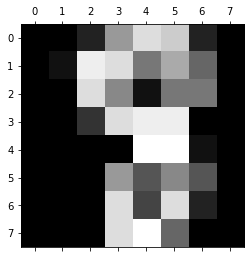

In [4]:
pl.gray() # Queremos las imágenes en grises
pl.matshow(digits.images[1491]) # Imprimir una imagen dada

In [5]:
digits.target_names[8]

8

In [6]:
pl
numImagenes = len(digits.images) # Numero de imagenes, len es un método que provee el tamaño del arreglo
print("Se tienen en total:", numImagenes, "imágenes")
print(digits.images[3]) # Ver su representación en pixeles

Se tienen en total: 1797 imágenes
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]


Observe cada atributo del objeto digits, recorra cada imagen y obtenga su representación (_target_)

#### Solución

In [12]:
#Funcion que me devuelve los ocho en una lista
def numsOcho(lista):
    nums =[]
    numImagenes = len(lista)
    
    for i in range(numImagenes):
        if lista[i] == 8:
            nums.append(i)
    
    return nums



In [8]:
#Funcion que me devuelve los dos en una lista
def numsDos(lista):
    nums =[]
    numImagenes = len(lista)
    
    for i in range(numImagenes):
        if lista[i] == 2:
            nums.append(i)
    
    return nums



In [9]:
## Sacar la media de los elementos de una lista de matrices

def mediaMatrices(listaTargets,listaElementos, numero):
    if numero == 8:
        lista = numsOcho(listaTargets)
    elif numero == 2:
        lista = numsDos(listaTargets)
    else:
        return [0,0]
    
    maxBuscados = int(len(lista)*0.3)
    totalSup = 0
    totalInf = 0
    
    for i in range(maxBuscados):
        sumatoriaSup =0
        sumatoriaInf = 0
        for r in range(8):
            for c in range(8):
                if r<4:
                    sumatoriaSup += listaElementos[lista[i]][r][c]
                else:
                    sumatoriaInf += listaElementos[lista[i]][r][c]
        
        totalSup += sumatoriaSup
        
        totalInf += sumatoriaInf
    
    
    MediaSup = totalSup/maxBuscados
    MediaInf = totalInf/maxBuscados
    return [MediaSup,MediaInf]
    


In [10]:
## Verificar Precisión

def verificarPrecision(listaTargets, listaImages,digito):
    numImagenes = len(listaImages)
    mediaNum = mediaMatrices(listaTargets,listaImages,digito)

    vp = 0
    fp = 0
    for i in range(numImagenes):
        sumatoriaSup =0
        sumatoriaInf = 0
        for r in range(8):
            for c in range(8):
                if r<4:
                    sumatoriaSup += listaImages[i][r][c]
                else:
                    sumatoriaInf += listaImages[i][r][c]


        difSuperior= abs(mediaNum[0]-sumatoriaSup)
        difInferior= abs(mediaNum[1]-sumatoriaInf)
        if digito == 8:
            if difSuperior<=34 and difInferior<=37:

                if listaTargets[i] ==8:
                    vp = vp+1
                else:
                    fp = fp+1
            else:
                if listaTargets[i] ==8:
                    fp = fp+1
        elif digito == 2:
            if difSuperior<=34 and difInferior<=37:

                if listaTargets[i] ==2:
                    vp = vp+1
                else:
                    fp = fp+1
            else:
                if listaTargets[i] ==2:
                    fp = fp+1
    precision = vp / (vp +fp)
    print("Para el dígito",digito,"los resultados obtenidos fueron:")
    print("VP = ",vp)
    print("FP = ",fp)
    print("Precision =",precision *100,"%")



In [11]:
#Ejecución completa
from time import time
start_time = time()

# Aquí se realiza el llamado al método, el último parámetro es para indicar si desea realizar 
# la prueba para el numero ocho(8) o para el número dos(2), otro número ocasionará error en el funcionamiento
# no se controlaron esos casos

verificarPrecision(digits.target, digits.images,8)
print("----------------------------------------------------")

verificarPrecision(digits.target, digits.images,2)
print("----------------------------------------------------")

elapsed_time = time() - start_time
print("Tiempo que duró la prueba: %.10f segundos." % elapsed_time)


Para el dígito 8 los resultados obtenidos fueron:
VP =  138
FP =  792
Precision = 14.838709677419354 %
----------------------------------------------------
Para el dígito 2 los resultados obtenidos fueron:
VP =  151
FP =  737
Precision = 17.004504504504506 %
----------------------------------------------------
Tiempo que duró la prueba: 0.2298583984 segundos.


In [66]:
#Función para sacar el total de apariciones del número 2
def totaldos() :
    list = []
    counter = 0
    for i in digits.target :
        if(i == 2) :
            list.append(counter)
        counter+=1
    return list

#Función para sacar el 30% de los datos que sean números 2
def muestraDos():
    list = []
    counter = 0
    for i in digits.target :
        if(i == 2) :
            list.append(counter)            
            counter+=1
            
    newList = list[0 : int(len(list)*0.3)]    
    return newList


# Función para el patrón del número 2
def patronDos(matriz):
    cont = 0
    salida = False
    if ((matriz[0][2] +matriz[0][3] +matriz[0][4]) >= 13):
        cont = cont + 1
    if ((matriz[1][2] +matriz[1][3] +matriz[1][4]) >= 41):
        cont = cont + 1
    if ((matriz[2][3] +matriz[2][4] +matriz[2][5]) >= 21):
        cont = cont + 1
    if ((matriz[3][3] +matriz[3][4]) >= 23):
        cont = cont + 1
    if ((matriz[4][2] +matriz[4][3] +matriz[4][4]) >= 24):
        cont = cont + 1
    if ((matriz[5][2] +matriz[5][3] +matriz[5][4]) >= 30):
        cont = cont + 1
    if ((matriz[6][1] +matriz[6][2] +matriz[6][3]+matriz[6][4]+matriz[6][5]+matriz[6][6]) >= 62):
        cont = cont + 1
    if ((matriz[7][1] +matriz[7][2] +matriz[7][3]+matriz[7][4]+matriz[7][5]+matriz[7][6]) >= 78):
        cont = cont + 1
        
    if(cont >= 4):
        salida = True
    return salida


VP = 0
FP = 0
for i in muestraDos() :
    if(patronDos(digits.images[i]) == True):
        VP = VP + 1
    else :
        FP = FP + 1
        
print("Análisis para el 30 % de los datos (números 2)")        
print("VP :", VP)
print("FP :", FP)
print("Reales :", (len(muestraDos())))
print("Precisión :", ((VP/(VP+FP))*100), "%")
print("----------------------------------------------------")
    

VP = 0
FP = 0
for i in totaldos() :
    if(patronDos(digits.images[i]) == True):
        VP = VP + 1
    else :
        FP = FP + 1
   
print("Análisis para el 100 % de los datos (números 2)")        
print("VP :", VP)
print("FP :", FP)
print("Reales :", (len(totaldos())))
print("Precisión :", ((VP/(VP+FP))*100), "%")
print("Tiempo que duró la prueba: %.10f segundos." % elapsed_time)

Análisis para el 30 % de los datos (números 2)
VP : 22
FP : 31
Reales : 53
Precisión : 41.509433962264154 %
----------------------------------------------------
Análisis para el 100 % de los datos (números 2)
VP : 68
FP : 109
Reales : 177
Precisión : 38.4180790960452 %
Tiempo que duró la prueba: 0.2298583984 segundos.
